# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build query url
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="
count = 0

# open new file for data
with open("output_data/weather_data.csv", "w") as weather_data:
    weather_writer = csv.writer(weather_data, delimiter=",")
    weather_writer.writerow(["City", "Lat", "Lng", "Max Temp", \
                            "Humidity", "Cloudiness", "Wind Speed", \
                            "Country", "Date"])
    print("Beginning Data Retrieval")
    print("-----------------------------------")
    
    # loop for api requests
    for city1 in cities:
        query_url= url + city1
        weather_json=requests.get(query_url).json()
        try:
            lat = weather_json["coord"]["lat"]
            lng = weather_json["coord"]["lon"]
            max_temp = round(weather_json["main"]["temp_max"] * 9 / 5 - 459.67, 2)
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            country = weather_json["sys"]["country"]
            date = weather_json["dt"]
        except KeyError:
            print("City not found. Skipping...")
            continue 
        weather_writer.writerow([city1, lat, lng, max_temp, humidity, \
                            cloudiness, wind_speed, country, date])
        count += 1
        print(f"Processing Record {count} | {city1}")
    print("-----------------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------------")


Beginning Data Retrieval
-----------------------------------
Processing Record 1 | tessalit
Processing Record 2 | jasmine estates
Processing Record 3 | rikitea
Processing Record 4 | punta arenas
Processing Record 5 | albany
Processing Record 6 | plzen
Processing Record 7 | faanui
Processing Record 8 | sioux lookout
Processing Record 9 | ciudad bolivar
Processing Record 10 | mar del plata
Processing Record 11 | grindavik
Processing Record 12 | vaini
Processing Record 13 | chernyshevskiy
City not found. Skipping...
Processing Record 14 | puerto ayora
Processing Record 15 | bambous virieux
City not found. Skipping...
Processing Record 16 | mahebourg
Processing Record 17 | busselton
Processing Record 18 | miles city
Processing Record 19 | jamestown
City not found. Skipping...
Processing Record 20 | butaritari
Processing Record 21 | pevek
Processing Record 22 | unity
Processing Record 23 | hermanus
Processing Record 24 | saskylakh
Processing Record 25 | stykkisholmur
Processing Record 26 | 

Processing Record 233 | katsuura
Processing Record 234 | ostrovnoy
Processing Record 235 | zdvinsk
Processing Record 236 | adrar
Processing Record 237 | codrington
Processing Record 238 | naze
Processing Record 239 | vestmannaeyjar
Processing Record 240 | banjar
Processing Record 241 | voskresenskoye
Processing Record 242 | ornskoldsvik
Processing Record 243 | severo-kurilsk
Processing Record 244 | mao
Processing Record 245 | bethel
Processing Record 246 | kismayo
Processing Record 247 | katangli
Processing Record 248 | guerrero negro
Processing Record 249 | avarua
Processing Record 250 | monte azul
Processing Record 251 | zhezkazgan
Processing Record 252 | kalang
Processing Record 253 | college
Processing Record 254 | leningradskiy
City not found. Skipping...
Processing Record 255 | te anau
Processing Record 256 | victoria
Processing Record 257 | miragoane
Processing Record 258 | cabo san lucas
Processing Record 259 | mount gambier
Processing Record 260 | havelock
Processing Record 26

Processing Record 465 | chingola
Processing Record 466 | thibodaux
Processing Record 467 | christchurch
Processing Record 468 | whitianga
Processing Record 469 | ayagoz
Processing Record 470 | scarborough
Processing Record 471 | chernyy yar
Processing Record 472 | semirom
Processing Record 473 | fallon
Processing Record 474 | sturgeon bay
Processing Record 475 | naryan-mar
Processing Record 476 | las vegas
Processing Record 477 | bukama
Processing Record 478 | nizhniy odes
Processing Record 479 | pangody
Processing Record 480 | indian head
City not found. Skipping...
City not found. Skipping...
Processing Record 481 | vila velha
Processing Record 482 | caravelas
Processing Record 483 | felipe carrillo puerto
Processing Record 484 | rurrenabaque
Processing Record 485 | marsaxlokk
Processing Record 486 | muisne
Processing Record 487 | duverge
Processing Record 488 | santa vitoria do palmar
Processing Record 489 | sijunjung
Processing Record 490 | artesia
Processing Record 491 | cockburn 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Import csv to a dataframe and then check column counts. 
city_data = pd.read_csv("output_data/weather_data.csv")
city_data.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       579
Date          584
dtype: int64

In [5]:
# Display the dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tessalit,20.20,1.01,90.99,29,15,4.05,ML,1595193304
1,jasmine estates,28.29,-82.69,87.01,78,89,0.89,US,1595193304
2,rikitea,-23.12,-134.97,68.38,73,38,7.24,PF,1595193304
3,punta arenas,-53.15,-70.92,35.60,69,75,3.60,CL,1595193239
4,albany,42.60,-73.97,96.01,41,63,4.06,US,1595193305


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data["Humidity"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
Index = city_data[city_data["Humidity"] > 100].index.tolist()
print(Index)

[]


In [8]:
# calculate outliers for Humidity
humidity_series = city_data["Humidity"]
quartiles = humidity_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Humidity values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.")

Humidity values below 19.5 and above 127.5 could be outliers.


In [9]:
# Get the indices of cities that have humidity lower than the lower_bound. 
# All test runs on data have not included any humidity above upper_bound. 
Index_outliers = city_data[city_data["Humidity"] < lower_bound].index.tolist()
print(Index_outliers)

[43, 108, 144, 183, 192, 235, 290, 371, 375, 446, 452, 472, 475, 542, 545, 546, 556, 557, 579]


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(Index_outliers)
clean_city_data.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       561
Date          565
dtype: int64

In [33]:
# Extract relevant fields from the data frame
final_city_data = clean_city_data[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country"]]

# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

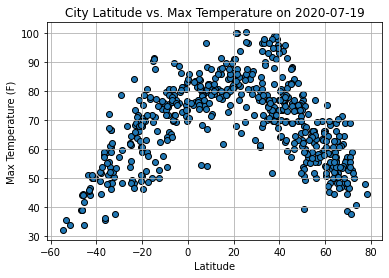

In [14]:
today = date.today()

latitude = final_city_data["Lat"]
maximum_temperature = final_city_data["Max Temp"]

plt.scatter(latitude, maximum_temperature, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature on {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

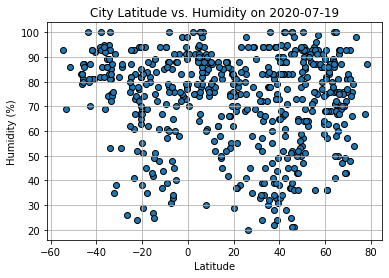

In [15]:
humidity1 = final_city_data["Humidity"]

plt.scatter(latitude, humidity1, edgecolors="black")
plt.title(f"City Latitude vs. Humidity on {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

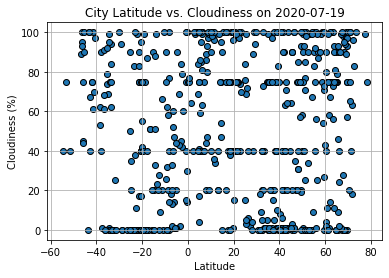

In [16]:
cloudiness1 = final_city_data["Cloudiness"]

plt.scatter(latitude, cloudiness1, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness on {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

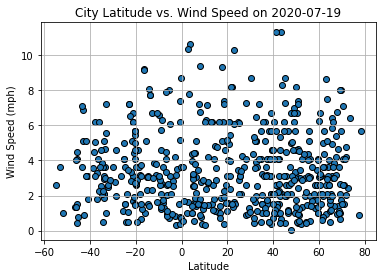

In [17]:
wind_speed1 = final_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed1, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed on {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern = final_city_data[final_city_data["Lat"] >= 0]
southern = final_city_data[final_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4573164631913356


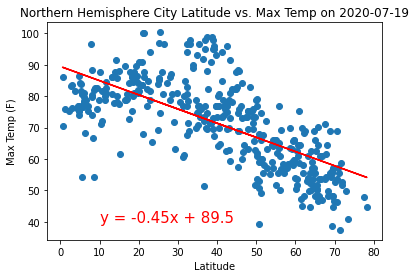

In [19]:
n_lat = northern["Lat"]
n_max_temp = northern["Max Temp"]
x_values = n_lat
y_values = n_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6042286868468171


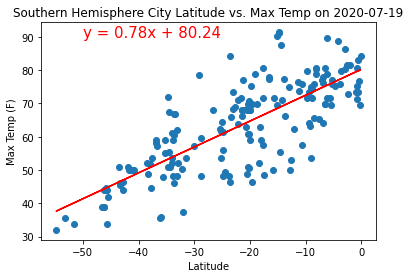

In [20]:
s_lat = southern["Lat"]
s_max_temp = southern["Max Temp"]
x_values = s_lat
y_values = s_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0016107101794930897


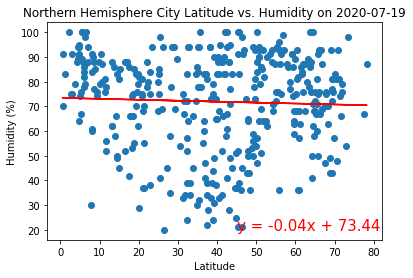

In [21]:
n_humidity = northern["Humidity"]
x_values = n_lat
y_values = n_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.061025280055416894


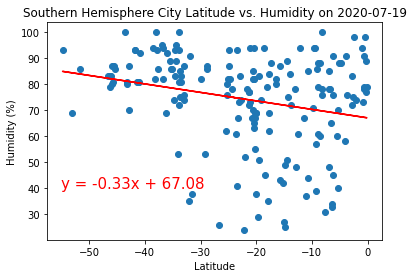

In [27]:
s_humidity = southern["Humidity"]
x_values = s_lat
y_values = s_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019960793302711364


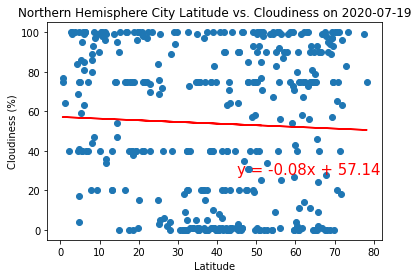

In [23]:
n_cloudiness = northern["Cloudiness"]
x_values = n_lat
y_values = n_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03467235384701894


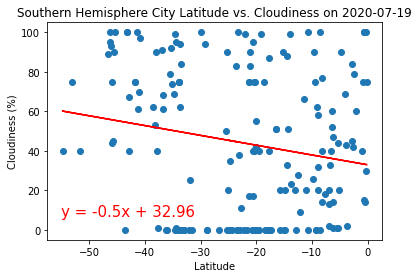

In [24]:
s_cloudiness = southern["Cloudiness"]
x_values = s_lat
y_values = s_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0010975131661218672


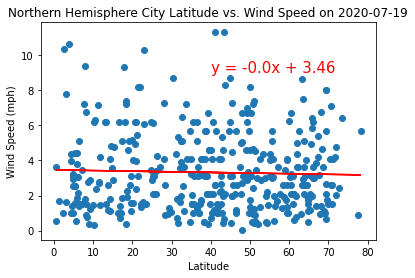

In [28]:
n_wind_speed = northern["Wind Speed"]
x_values = n_lat
y_values = n_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,9),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017165314363036149


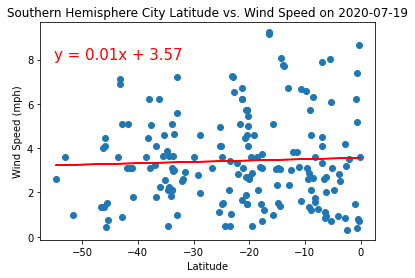

In [26]:
s_wind_speed = southern["Wind Speed"]
x_values = s_lat
y_values = s_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig12.png")
plt.show()